#Contents
## 1-Grap cut
## 2-text detector and extractor
## 3-barcode and qrcode makker and reader
## 4-object detection with yolo 3

In [1]:
import cv2
import dlib
import sys
import numpy as np
from matplotlib import pyplot as plt

def show(image=None,string='',size=10):
  width,hight=image.shape[:2]
  asp=width/hight
  plt.figure(figsize=(asp*size,size))
  plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
  plt.title(string)
  plt.show()


In [2]:
!wget https://github.com/rajeevratan84/ModernComputerVision/raw/main/woman.jpeg

--2023-04-26 23:41:02--  https://github.com/rajeevratan84/ModernComputerVision/raw/main/woman.jpeg
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/woman.jpeg [following]
--2023-04-26 23:41:02--  https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/woman.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17368 (17K) [image/jpeg]
Saving to: ‘woman.jpeg’

woman.jpeg          100%[===================>]  16.96K  --.-KB/s    in 0.001s  

2023-04-26 23:41:02 (25.0 MB/s) - ‘woman.jpeg’ saved [17368/17368]



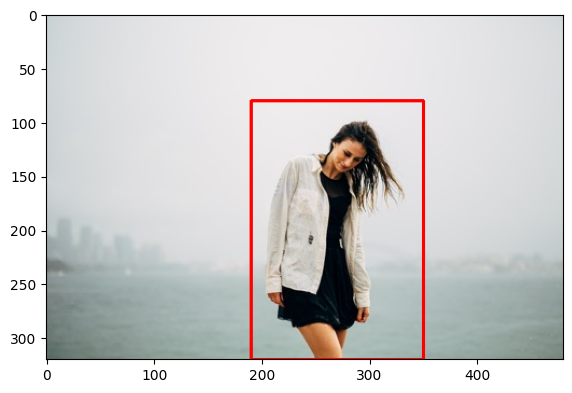

In [3]:
image = cv2.imread('woman.jpeg')
mask=np.zeros(image.shape[:2],np.uint8)

fgm=np.zeros((1,65),np.float64)
bkgrnd=np.zeros((1,65),np.float64)

x1,x2,y1,y2=190,350,80,320
test=image.copy()
rect = (x1,y1,x2-x1,y2-y1)
cv2.rectangle(test,(190,80),(350,320),(0,0,255),2)
show(test)

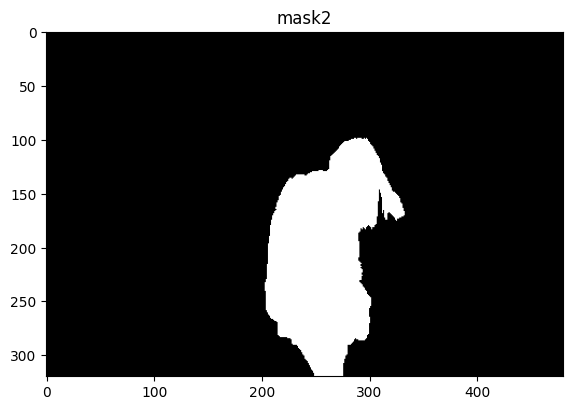

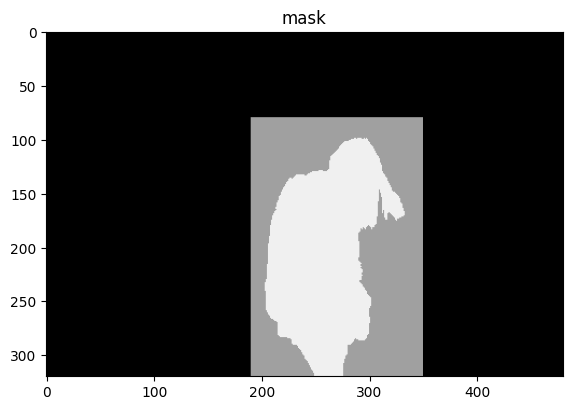

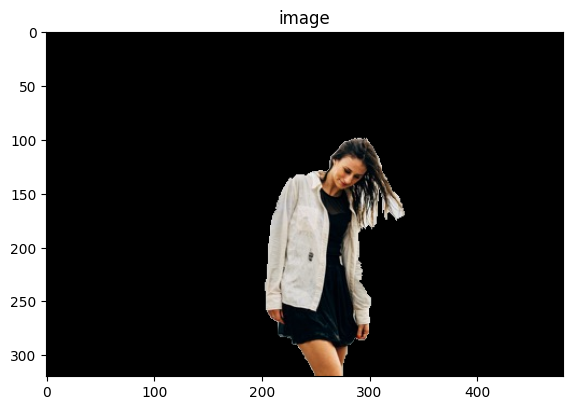

In [4]:
cv2.grabCut(image, mask, rect, bkgrnd, fgm, 5, cv2.GC_INIT_WITH_RECT)
mask2=np.where(((mask==0)|(mask==2)),0,1).astype('uint8')
image=image*mask2[:,:,np.newaxis]
show(mask2*255,"mask2")
show(mask*80,"mask")
show(image,"image")


In [5]:
# Install PyTesseract and setup on Colab
!sudo apt install tesseract-ocr
!pip install pytesseract

!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/OCRSamples.zip
!unzip -qq OCRSamples.zip

# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import pytesseract
import numpy as np
from matplotlib import pyplot as plt

pytesseract.pytesseract.tesseract_cmd = (
    r'/usr/bin/tesseract'
)



# Download and unzip our images 
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/OCRSamples.zip
!unzip -qq OCRSamples.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 1s (8,036 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fro

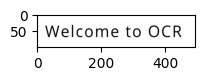

the image text i s Welcome to OCR



In [6]:
img = cv2.imread('OCR Samples/OCR1.png')
show(img)

output=pytesseract.image_to_string(img)
print("the image text i s {}".format(output))

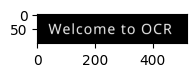

the image text i s Welcome to OCR



In [7]:
img = cv2.imread('OCR Samples/OCR2.png')
show(img)
output=pytesseract.image_to_string(img)
print("the image text i s {}".format(output))

In [8]:
!wget https://github.com/rajeevratan84/ModernComputerVision/raw/main/Receipt-woolworth.jpg

--2023-04-26 23:43:05--  https://github.com/rajeevratan84/ModernComputerVision/raw/main/Receipt-woolworth.jpg
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/Receipt-woolworth.jpg [following]
--2023-04-26 23:43:05--  https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/Receipt-woolworth.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93450 (91K) [image/jpeg]
Saving to: ‘Receipt-woolworth.jpg’

Receipt-woolworth.j 100%[===================>]  91.26K  --.-KB/s    in 0.02s   

2023-04-26 23:43:06 (5.33 MB/s) - ‘Receipt-woolworth.jpg’ s

In [9]:
from skimage.filters import threshold_local
from pytesseract import Output


image = cv2.imread('Receipt-woolworth.jpg')

V=cv2.split(cv2.cvtColor(image,cv2.COLOR_BGR2HSV))[2]
T=threshold_local(V, 25, offset=15, method="gaussian")
thr=(V>T).astype("uint8") * 255
out=pytesseract.image_to_string(thr)
dic=pytesseract.image_to_data(thr, output_type = Output.DICT)
print("the text is {}".format(out))

the text is o
Woolworths @)
The fresh food people
VICTORIA HARBOUR PH: 0383476527

Store Manager is David
" WOOLHORTHS TAX INVOICE ~ ABN 88 000 014 675

wh SANDWICH CLASSIC EGG & LETTUCE 6.00
APPLE PINK LAUY
G.217 kg NET @ = $3.90/kg 0.85
HACRO ORGANC FRESH NILK LOW FAT IL 2.20
BANANA CAVENDISH
0.572 kg NET @ = $2.50/kg “1.43
GOLDEN PIKELET BITES 16PK 140GH 3.99
GOLDEN PIKELETS 8 PK2OOGH 3.99
GOLDEN PANCAK OFFER -1,98
6 = SUBTOTAL $16.48

WOOLWORTHS 3306

tITAT ANT A DIAnR



In [10]:
print(dic.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


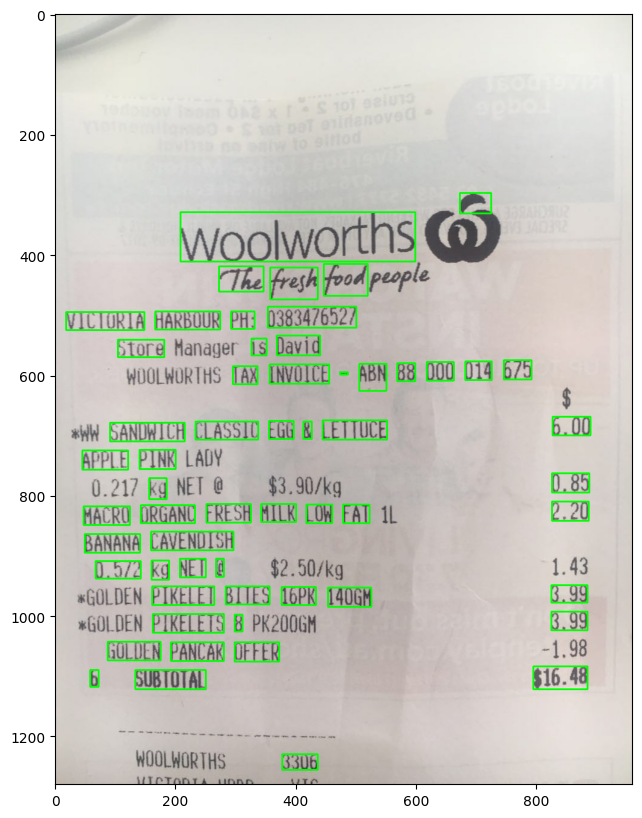

In [11]:
for i in range(len(dic['text'])):
  if(dic['conf'][i]>60):
    (x, y, w, h) = (dic['left'][i], dic['top'][i], dic['width'][i], dic['height'][i])
    image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
show(image)

In [12]:
!pip install easyocr
!wget https://github.com/rajeevratan84/ModernComputerVision/raw/main/whatsapp_conv.jpeg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.2/608.2 kB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 MB 14.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.7.0.72
    Uninstalling opencv-python-headless-4.7.0.72:
      Successfully uninstalled opencv-python-headless-4.7.0.72


--2023-04-26 23:43:30--  https://github.com/rajeevratan84/ModernComputerVision/raw/main/whatsapp_conv.jpeg
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/whatsapp_conv.jpeg [following]
--2023-04-26 23:43:30--  https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/whatsapp_conv.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91841 (90K) [image/jpeg]
Saving to: ‘whatsapp_conv.jpeg’

whatsapp_conv.jpeg  100%[===================>]  89.69K  --.-KB/s    in 0.01s   

2023-04-26 23:43:31 (6.60 MB/s) - ‘whatsapp_conv.jpeg’ saved [91841/918

In [13]:
!pip uninstall opencv-python -y
!pip install opencv-python-headless==4.1.2.30

Found existing installation: opencv-python 4.7.0.72
Uninstalling opencv-python-4.7.0.72:
  Successfully uninstalled opencv-python-4.7.0.72
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement opencv-python-headless==4.1.2.30 (from versions: 3.4.10.37, 3.4.11.39, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.14.51, 3.4.14.53, 3.4.15.55, 3.4.16.59, 3.4.17.61, 3.4.17.63, 3.4.18.65, 4.3.0.38, 4.4.0.40, 4.4.0.42, 4.4.0.44, 4.4.0.46, 4.5.1.48, 4.5.2.52, 4.5.2.54, 4.5.3.56, 4.5.4.58, 4.5.4.60, 4.5.5.62, 4.5.5.64, 4.6.0.66, 4.7.0.68, 4.7.0.72)
ERROR: No matching distribution found for opencv-python-headless==4.1.2.30


In [14]:
from matplotlib import pyplot as plt
from easyocr import Reader
import pandas as pd
import cv2
import time

image = cv2.imread("whatsapp_conv.jpeg")
reader = Reader(['en'], gpu = False)
results = reader.readtext(image)
results

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[24, 12], [192, 12], [192, 38], [24, 38]],
  'bmobile _ill < 82',
  0.12457802840124284),
 ([[396, 12], [510, 12], [510, 38], [396, 38]],
  '"\'0 ^ (50%',
  0.3369437989007717),
 ([[546, 12], [594, 12], [594, 36], [546, 36]], '8.04', 0.9920759797096252),
 ([[114, 74], [302, 74], [302, 122], [114, 122]],
  'Saffiya Khan',
  0.7756983803537445),
 ([[110, 174], [200, 174], [200, 204], [110, 204]],
  'God of',
  0.9911833572848934),
 ([[254, 173], [476, 173], [476, 206], [254, 206]],
  'Last of Us, Mortal',
  0.908146954391923),
 ([[110, 206], [454, 206], [454, 238], [110, 238]],
  'Kombat 11 and Ratchet and',
  0.859354745826267),
 ([[110, 240], [250, 240], [250, 270], [110, 270]],
  'Clank__and',
  0.7085109262712401),
 ([[264, 238], [558, 238], [558, 270], [264, 270]],
  'still have tomb raider to',
  0.9720005937874658),
 ([[107, 279], [167, 279], [167, 315], [107, 315]],
  'play',
  0.8657418620480265),
 ([[452, 294], [544, 294], [544, 322], [452, 322]],
  '12.41 pm',
  0.984380966

 Probability of Text: 12.458% OCR'd Text: bmobile _ill < 82
 Probability of Text: 33.694% OCR'd Text: "'0 ^ (50%
 Probability of Text: 99.208% OCR'd Text: 8.04
 Probability of Text: 77.570% OCR'd Text: Saffiya Khan
 Probability of Text: 99.118% OCR'd Text: God of
 Probability of Text: 90.815% OCR'd Text: Last of Us, Mortal
 Probability of Text: 85.935% OCR'd Text: Kombat 11 and Ratchet and
 Probability of Text: 70.851% OCR'd Text: Clank__and
 Probability of Text: 97.200% OCR'd Text: still have tomb raider to
 Probability of Text: 86.574% OCR'd Text: play
 Probability of Text: 98.438% OCR'd Text: 12.41 pm
 Probability of Text: 99.971% OCR'd Text: Saffiya Khan
 Probability of Text: 58.658% OCR'd Text: Have to come by you to get back my wii
 Probability of Text: 55.833% OCR'd Text: remote to give it to him:
 Probability of Text: 77.152% OCR'd Text: Yea come anytime, U can pass today
 Probability of Text: 69.669% OCR'd Text: if you want
 Probability of Text: 72.726% OCR'd Text: 12.41 pm
 P

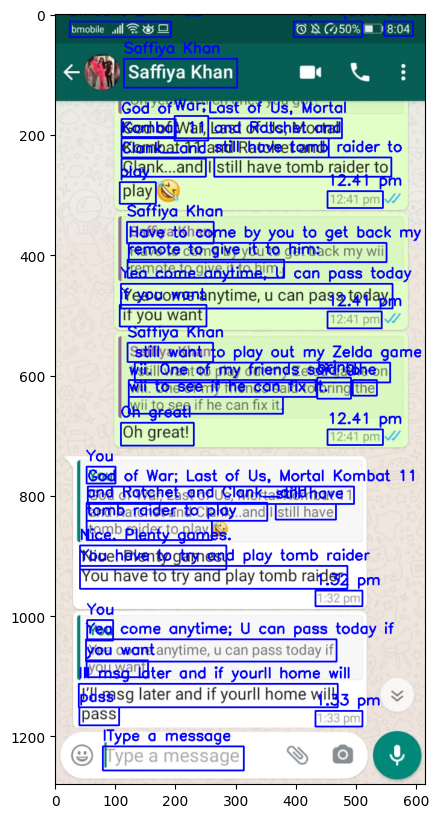

In [15]:
all_text = []

# iterate over our extracted text 
for (bbox, text, prob) in results:
    # display the OCR'd text and the associated probability of it being text
    print(f" Probability of Text: {prob*100:.3f}% OCR'd Text: {text}")

    # get the bounding box coordinates
    (tl, tr, br, bl) = bbox
    tl = (int(tl[0]), int(tl[1]))
    tr = (int(tr[0]), int(tr[1]))
    br = (int(br[0]), int(br[1]))
    bl = (int(bl[0]), int(bl[1]))

    # Remove non-ASCII characters from the text so that
    # we can draw the box surrounding the text overlaid onto the original image
    text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
    all_text.append(text)
    cv2.rectangle(image, tl, br, (255, 0, 0), 2)
    cv2.putText(image, text, (tl[0], tl[1] - 10),
      cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)
show(image)

Progress: |██████████████████████████████████████████████████| 100.0% Complete[INFO] 0.0000: 
[INFO] 0.0000: 
[INFO] 0.0000: 
[INFO] 0.0220: 900
[INFO] 0.9169: Woolworths
[INFO] 0.2355: The fregh food
[INFO] 0.6125: VICIURIA HARBOUR PH:  0383476527
[INFO] 0.7185: Store Hanager
[INFO] 0.6325: i$ ٥avid
[INFO] 0.3334: WUULWURIHS TAX INVOICE
[INFO] 0.6725: ABN 88 000 014 675
[INFO] 0.9711: $
[INFO] 0.1758: *Ah SANDHICH CLASSIC EGG & LETIUCE
[INFO] 0.8745: 6. 00
[INFO] 0.6453: AFPLE PINK LALV
[INFO] 0.2459: 0. 217 kg N٤٢
[INFO] 0.9519: $3. 90/k9
[INFO] 0.7346: 0. 85
[INFO] 0.4177: HACRO ORGANC FRESH HILK LOW FAT 1l
[INFO] 0.5283: 2. 20
[INFO] 0.8945: BANANA CAVENDISH
[INFO] 0.2964: 0. 572 k ٤٢
[INFO] 0.3659: 0
[INFO] 0.9980: $2
[INFO] 0.9854: 1. 43
[INFO] 0.5516: *GULDEN PIKELEI BIES 16PK 14OGH
[INFO] 0.9248: 3. 99
[INFO] 0.3364: »GOLIEN PIKELETS 8 PKZUUIH
[INFO] 0.9786: 3. 99
[INFO] 0.3624: fULILN PANCAK OFFER
[INFO] 0.4808: -1. 98
[INFO] 0.4640: ٥
[INFO] 0.3228: SUBTUTAL
[INFO] 0.9978: $1

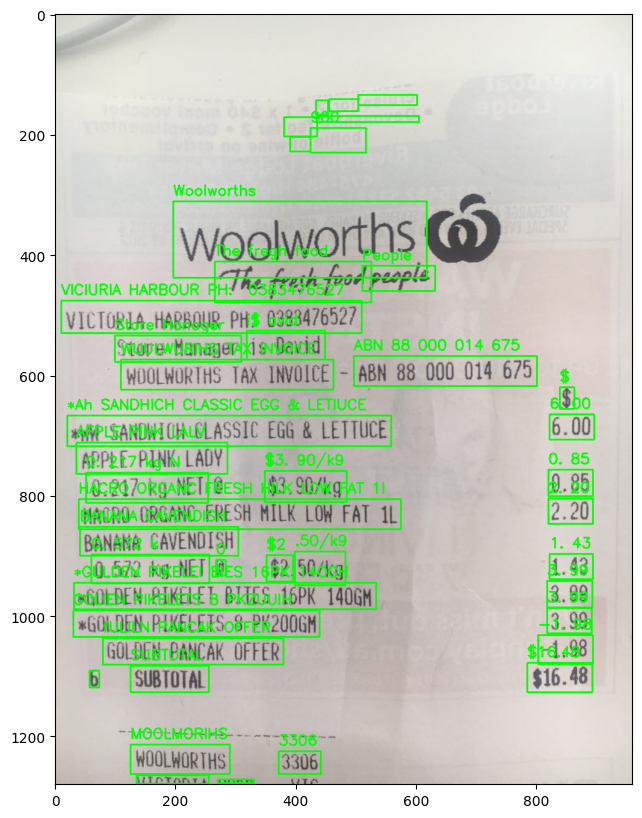

EASY OCR Extracted: .50/k9


In [16]:
def clean_text(text):
	# remove non-ASCII text so we can draw the text on the image
	return "".join([c if ord(c) < 128 else "" for c in text]).strip()

image = cv2.imread('Receipt-woolworth.jpg')

reader = Reader(["en","ar"], gpu=False)
results = reader.readtext(image)

# loop over the results
for (bbox, text, prob) in results:
	# display the OCR'd text and associated probability
	print("[INFO] {:.4f}: {}".format(prob, text))

	# unpack the bounding box
	(tl, tr, br, bl) = bbox
	tl = (int(tl[0]), int(tl[1]))
	tr = (int(tr[0]), int(tr[1]))
	br = (int(br[0]), int(br[1]))
	bl = (int(bl[0]), int(bl[1]))

	# clean text and draw the box surrounding the text along
	text = clean_text(text)
	cv2.rectangle(image, tl, br, (0, 255, 0), 2)
	cv2.putText(image, text, (tl[0], tl[1] - 10),
		cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

# Apply the threshold operation 
#thresh = (V > T).astype("uint8") * 255
show(image)
print("EASY OCR Extracted: {}".format(text))

In [17]:
!pip install python-barcode[images]
!pip install qrcode
!apt install libzbar0
!pip install pyzbar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.9/212.9 kB 5.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 6.7 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libv4l-0 libv4lconvert0
The following NEW packages will be installed:
  libv4l-0 libv4lconvert0 libzbar0
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 238 kB of archives.
After this operation, 817 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libv4lconvert0 amd64 1.18.0-2build1 [76.5 kB]
Get:2 http://archive.ubuntu.com/ubuntu 

## **Barcodes Generation** 
Let's generate barcodes using our python-barcode package.

Supported Formats
At the time of this writing, this package supports the following formats:
- EAN-8
- EAN-13
- EAN-14
- UPC-A
- JAN
- ISBN-10
- ISBN-13
- ISSN
- Code 39
- Code 128
- PZN


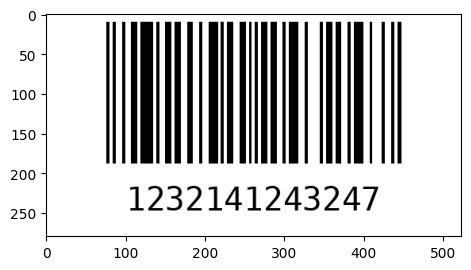

In [18]:
from barcode import EAN13
from barcode.writer import ImageWriter

with open("barcode.png","wb") as g:
  EAN13("12321412432432",writer=ImageWriter()).write(g)# you write the number that u want
image=cv2.imread("barcode.png")
show(image)

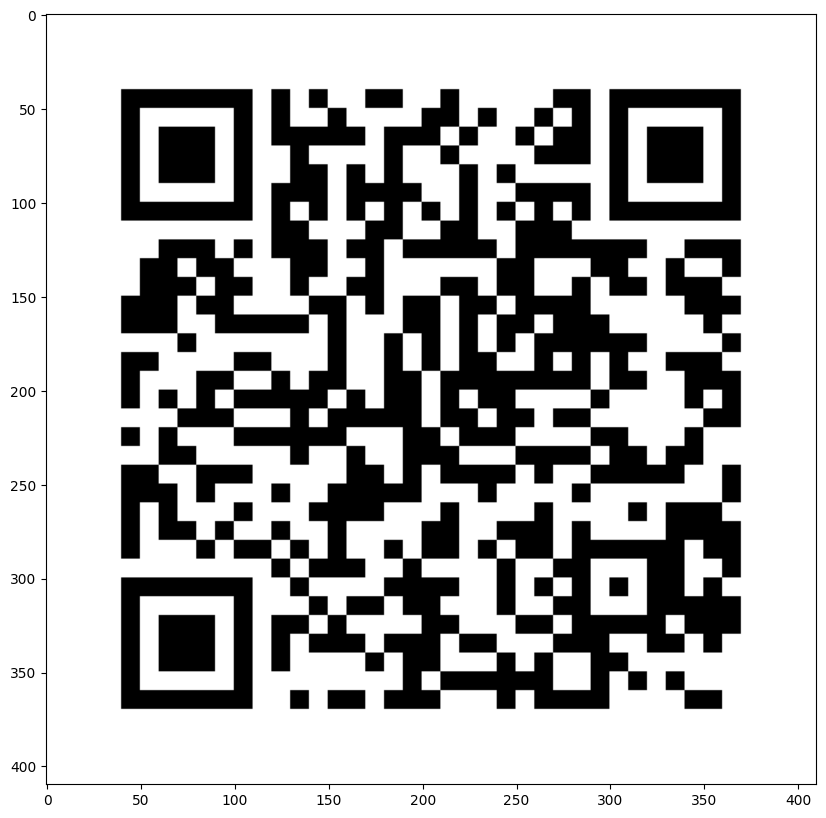

In [19]:
import qrcode
from PIL import Image

qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_H,
    box_size=10,
    border=4,
)
qr.add_data("https://github.com/AZIZMOH9")
qr.make(fit=True)
img = qr.make_image(fill_color="black", back_color="white")
img.save("qrcode.png")
qrcode = cv2.imread("qrcode.png")
show(qrcode)

In [20]:
from pyzbar.pyzbar import decode
from PIL import Image

img = Image.open('qrcode.png')
result = decode(img)
for i in result:
    print(i.data.decode("utf-8"))

https://github.com/AZIZMOH9


In [21]:
!wget https://i.stack.imgur.com/1DwED.jpg

--2023-04-26 23:46:25--  https://i.stack.imgur.com/1DwED.jpg
Resolving i.stack.imgur.com (i.stack.imgur.com)... 146.75.80.193
Connecting to i.stack.imgur.com (i.stack.imgur.com)|146.75.80.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 439449 (429K) [image/jpeg]
Saving to: ‘1DwED.jpg’

1DwED.jpg           100%[===================>] 429.15K  --.-KB/s    in 0.04s   

2023-04-26 23:46:26 (11.8 MB/s) - ‘1DwED.jpg’ saved [439449/439449]



[Point(x=558, y=938), Point(x=588, y=1288), Point(x=916, y=1275), Point(x=875, y=896)]
QR Code revealed: http://ruthenus.pl (QRCODE)


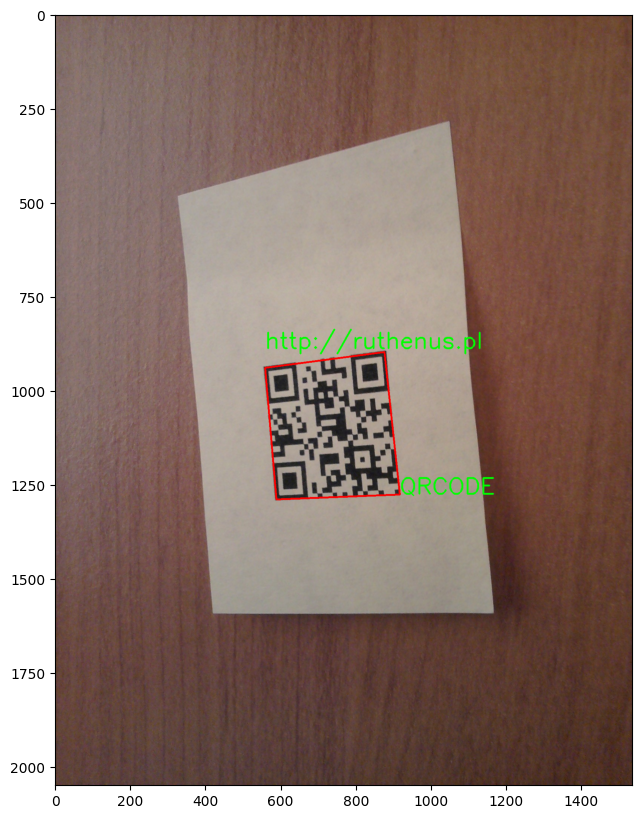

In [22]:
from pyzbar.pyzbar import decode

image = cv2.imread("1DwED.jpg")

# Detect and decode the qrcode
codes = decode(image)

# loop over the detected barcodes
for bc in codes:
  # Get the rect coordiantes for our text placement
  (x, y, w, h) = bc.rect
  print(bc.polygon)
  pt1,pt2,pt3,pt4 = bc.polygon

  # Draw a bounding box over our detected QR code
  pts = np.array( [[pt1.x,pt1.y], [pt2.x,pt2.y], [pt3.x,pt3.y], [pt4.x,pt4.y]], np.int32)
  pts = pts.reshape((-1,1,2))
  cv2.polylines(image, [pts], True, (0,0,255), 3)

  # extract the string info data and the type from our object
  barcode_text = bc.data.decode()
  barcode_type = bc.type

  # show our 
  text = "{} ({})".format(barcode_text, barcode_type)
  cv2.putText(image, barcode_text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
  cv2.putText(image, barcode_type, (x+w, y+h - 15), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
  print("QR Code revealed: {}".format(text))

# display our output
show(image)